In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
print("All Libraries are successfully install")

All Libraries are successfully install


DATA LOADING


In [2]:
housing = fetch_california_housing(as_frame = True)
X = housing.data
y = housing.target
print("All Data is loaded Successfully")

All Data is loaded Successfully


In [3]:
print(f"Features X shape :  {X.shape}")
print(f"Target y shape : {y.shape}")

Features X shape :  (20640, 8)
Target y shape : (20640,)


In [4]:
print("\nData discription :")
print(housing.DESCR[:500] + "----")


Data discription :
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        ----


In [5]:
print("Feature name")
print(X.columns.tolist())

Feature name
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
print("Five first Rows of Data")
print(X.head())

Five first Rows of Data
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [7]:
print("Five first rows of target")
print(y.head())

Five first rows of target
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [8]:
print("\nbasic statis")
print(X.describe())


basic statis
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     

Data Exploration And Visualization


In [13]:
print(f"Missing Values in future")
print(X.isnull().sum())
print(f"\nMissing values in Target: {y.isnull().sum()}")

Missing Values in future
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Missing values in Target: 0


In [18]:
print("\n Target value Statistics")
print(f"Mean values of house $ {y.mean():.2f}(In Hundreds Of Thousands)")
print(f"Median Values of house $ {y.median():.2f}(In Hundred Of Thousands)")
print(f"Max value of Housing $ {y.max():.2f}(In Hunderd of Thousands)")
print(f"Min Value of Housing $ {y.min():.2f}(In Hundred Of Thousands)")


 Target value Statistics
Mean values of house $ 2.07(In Hundreds Of Thousands)
Median Values of house $ 1.80(In Hundred Of Thousands)
Max value of Housing $ 5.00(In Hunderd of Thousands)
Min Value of Housing $ 0.15(In Hundred Of Thousands)


C:\Users\Friendss\AppData\Local\Temp\ipykernel_17996\2868890034.py:37: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


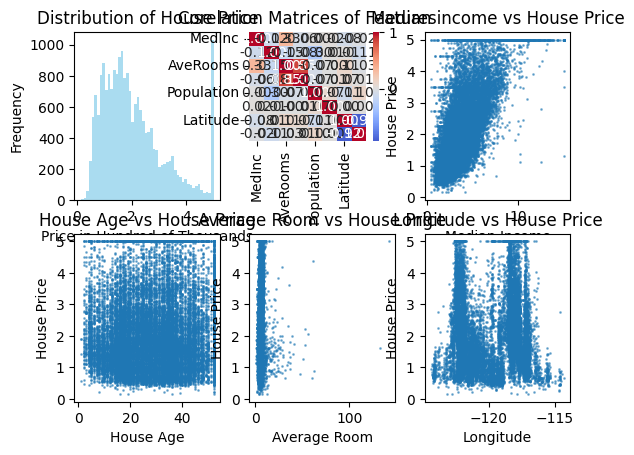

In [38]:
plt.Figure(figsize=(15 , 10))
plt.subplot(2, 3,1)
plt.hist(y ,bins=50 , alpha=0.7,color= 'skyblue')
plt.title("Distribution of House Price")
plt.xlabel("Price in Hundred of Thousands")
plt.ylabel("Frequency")
# Corealtion Matrix
plt.subplot(3, 3, 2)
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix , annot= True , cmap="coolwarm", center=0, fmt=".2f")
plt.title("Corelation Matrices of Features")
 
plt.subplot(2, 3, 3)
plt.scatter(X['MedInc'], y, alpha=0.5, s=1)
plt.title("Median income vs House Price")
plt.xlabel("Median Income")
plt.ylabel("House Price")

plt.subplot(2, 3, 4)
plt.scatter(X['HouseAge'], y, alpha=0.5, s=1)
plt.title("House Age vs House Price")
plt.xlabel("House Age")
plt.ylabel("House Price")

plt.subplot(2, 3, 5)
plt.scatter(X['AveRooms'], y, alpha=0.5, s=1)
plt.title("Average Room vs House Price")
plt.xlabel("Average Room")
plt.ylabel("House Price")

plt.subplot(2, 3, 6)
plt.scatter(X['Longitude'], y, alpha=0.5, s=1)
plt.title("Longitude vs House Price")
plt.xlabel("Longitude")
plt.ylabel("House Price")

plt.tight_layout()
plt.show()





Data Preprocessing and Cleaning

In [ ]:
X_train , X_test ,y_train ,y_test = train_test_split()